# Artificial Neural Network 

In [27]:
#importing dependencies
import pandas as pd
import numpy as np


In [28]:
# loading dataset
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


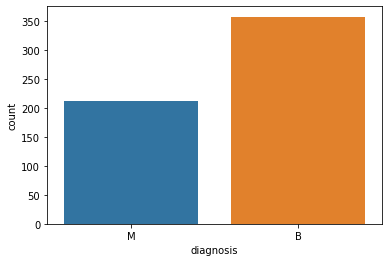

In [29]:
#visualizing quantity
import seaborn as sns 
ax = sns.countplot(df['diagnosis'],label='count')

In [30]:
#spliting data 
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [31]:
#encoding label
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [32]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [34]:
x_train.shape

(455, 31)

In [35]:
#import model platform 
import keras
from keras.models import sequential
from keras.layers import Dense

In [36]:
from keras.engine.sequential import Sequential
#training model
classifier = Sequential()

#adding first hidden layer and input
classifier.add(Dense(16,activation='relu',input_dim=31))

#adding second hidden layer
classifier.add(Dense(16,activation='relu'))

#adding the output layer
classifier.add(Dense(1,activation='linear'))

In [37]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(x=x_train,y=y_train,batch_size=120,epochs=150,validation_split=0.2)

In [39]:
y_pred = classifier.predict(x_test)
y_pred =(y_pred > 0.5)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[73,  2],
       [ 0, 39]])

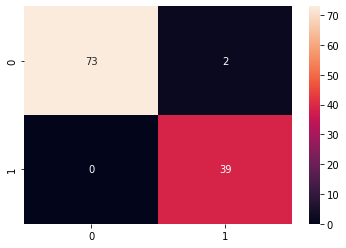

In [41]:
sns.heatmap(cm,annot=True)


### Tradeoff and incredible error

In [42]:
# importing libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [43]:
# defining function
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(16,activation='relu',input_dim=31))
  classifier.add(Dense(16,activation='relu'))
  classifier.add(Dense(1,activation='linear'))
  classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

In [44]:
classifier = KerasClassifier(build_fn=built_classifier,batch_size=100,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [45]:
accuracy = cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10,n_jobs=-1)

In [46]:
accuracy 

array([0.60869563, 0.82608694, 0.80434781, 0.69565219, 0.93478262,
       0.91111112, 0.93333334, 0.53333336, 0.91111112, 0.71111113])

In [47]:
accuracy.mean()

0.786956524848938

In [48]:
accuracy.std()

0.13643011460391827